In [13]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.optimize import minimize
import random

In [14]:
# read pd
df = pd.read_csv('MN_selected.csv')
df

,id,AssessTot,LotFront,NumFloors,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,...,LandUse_8,LandUse_9,LandUse_10,OwnerType_C,OwnerType_M,OwnerType_O,OwnerType_P,OwnerType_X,Zone,LandUse
0,0,156510900,0.00,0.0,2725731,0,0,0,0,0,...,1,0,0,0,0,0,1,0,L Manhattan,8
1,1,12197250,500.00,0.0,541886,0,0,0,0,0,...,1,0,0,0,0,0,0,1,L Manhattan,8
2,6,25390080,311.00,5.0,158197,0,0,0,0,0,...,0,0,0,1,0,0,0,0,L Manhattan,7
3,8,17134650,793.67,2.0,24346,0,0,0,0,0,...,0,0,0,1,0,0,0,0,L Manhattan,7
4,9,129665250,323.00,1.0,945425,0,0,0,0,0,...,0,1,0,1,0,0,0,0,L Manhattan,9
5,19,327600,19.00,4.5,4104,0,1026,3078,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,4
6,22,943650,36.17,5.0,4485,2990,1495,2990,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,4
7,26,535090,28.42,5.0,3012,4473,1491,1521,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,4
8,29,6046650,78.92,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,5
9,33,138236850,211.33,32.0,845018,0,839651,5367,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,5


In [15]:
df2 = pd.read_csv('MN with additional features.csv')

## Currently we are underfitting land with low values.

In [61]:
# lv = df2[np.log(df2['AssessTot'])<10]
# lv

In [30]:
# lv.groupby('Zone').count()

In [53]:
for i in range(len(df.columns)):
    print (i,df.columns[i])

(0, 'id')
(1, 'AssessTot')
(2, 'LotFront')
(3, 'NumFloors')
(4, 'ComArea')
(5, 'ResArea')
(6, 'OfficeArea')
(7, 'RetailArea')
(8, 'GarageArea')
(9, 'StrgeArea')
(10, 'FactryArea')
(11, 'OtherArea')
(12, 'YearBuilt')
(13, 'CommFAR')
(14, 'PopDensity')
(15, 'MedIncome')
(16, 'NumofHouses')
(17, 'EduRate')
(18, 'UnemployedRate')
(19, 'IfAlter')
(20, 'Central Harlem')
(21, 'Chelsea & Clinton')
(22, 'East Harlem')
(23, 'Gramercy Park and Murray Hill')
(24, 'GV & Soho')
(25, 'L Manhattan')
(26, 'L. East Side')
(27, 'U Eest Side')
(28, 'U West Side')
(29, 'WAHI')
(30, 'LandUse_1')
(31, 'LandUse_2')
(32, 'LandUse_3')
(33, 'LandUse_4')
(34, 'LandUse_5')
(35, 'LandUse_6')
(36, 'LandUse_7')
(37, 'LandUse_8')
(38, 'LandUse_9')
(39, 'LandUse_10')
(40, 'OwnerType_C')
(41, 'OwnerType_M')
(42, 'OwnerType_O')
(43, 'OwnerType_P')
(44, 'OwnerType_X')
(45, 'Zone')
(46, 'LandUse')


In [16]:
# convert to np
data = df.as_matrix()

In [69]:
# # plotting
# plt.plot(data[:,2],data[:,1],'.')
# plt.xlabel('LotArea')
# plt.ylabel('AssesTot')
# plt.show()

In [17]:
# log scale AssessTot
data[:,1] = np.log(1.0*np.hstack(data[:,1]))

In [18]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 10)
    upper_bound = quartile_3 + (iqr * 10)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [19]:
# remove outliers
index = np.zeros(len(data))
for i in range(1,5):
    index[outliers_iqr(data[:,i])] = 1
data = data[np.where(index==0)]

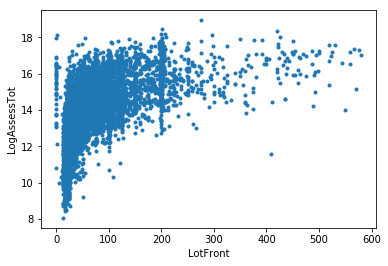

In [99]:
# plotting
plt.plot(data[:,2],data[:,1],'.')
plt.xlabel('LotFront')
plt.ylabel('LogAssessTot')
plt.show()

In [180]:
# import seaborn as sns
# # sns.set(style="ticks")
# plt.figure(figsize=(15,6))
# plt.xlabel('Zone')
# plt.ylabel('AssessTot')
# sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,33]),width=0.8,order=[u'Central Harlem', u'Chelsea & Clinton', u'East Harlem', u'G Park & M Hill', u'GV & Soho', u'L Manhattan',u'L. East Side', u'U Eest Side', u'U West Side', u'WAHI'])
# # sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,33]),width=0.8)
# plt.show()

In [66]:
# plt.figure(figsize=(15,6))
# plt.xlabel('LandUse')
# plt.ylabel('AssessTot')
# sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,34]),width=0.8)
# plt.show()

In [12]:
# # scaling
# data = data[:,1:33].astype(float)
# temp = data[:,:6]
# temp = (temp - temp.min(axis = 0))/(temp.max(axis=0)-temp.min(axis = 0))
# data = np.hstack((temp,data[:,6:]))
# # adding offset
# data = np.hstack((data,np.ones((len(data),1))))

In [51]:
# # scaling
# data = data[:,1:33].astype(float)
# temp = data[:,1:6]
# temp = (temp - temp.min(axis = 0))/(temp.max(axis=0)-temp.min(axis = 0))
# # scaler = StandardScaler()
# # scaler.fit(np.reshape(data[:,0],(len(data[:,0]),1)))
# # temp = scaler.transform(temp)
# data = np.hstack((np.column_stack((data[:,0],temp)),data[:,6:]))
# # adding offset
# data = np.hstack((data,np.ones((len(data),1))))

In [101]:
np.max(data[:,4:12],axis=0)

array([ 1176100.,    78589.,    71305.,    78896.,    73150.,    65307.,
          79000.,     2016.])

In [20]:
# scaling
data = data[:,1:45].astype(float)
temp = data[:,1:18]
temp = (temp - temp.min(axis = 0))/(temp.max(axis=0)-temp.min(axis = 0))
# scaler = StandardScaler()
# scaler.fit(np.reshape(data[:,0],(len(data[:,0]),1)))
# temp = scaler.transform(temp)
data = np.hstack((np.column_stack((data[:,0],temp)),data[:,18:]))
# adding offset
data = np.hstack((data,np.ones((len(data),1))))

In [103]:
data[2,:]

array([ 13.1902,   0.0491,   0.1923,   0.0381,   0.0038,   0.019 ,
         0.0213,   0.    ,   0.    ,   0.    ,   0.    ,   0.5378,
         1.    ,   0.    ,   0.4145,   0.    ,   0.9883,   0.2917,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         1.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   1.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         1.    ,   0.    ,   1.    ])

In [21]:
# partitioning, randomly select 80% samples as traininig set, 20% as test set
n = int(len(data)*0.8)
trainset = random.sample(range(len(data)),n)
testset = [i for i in range(len(data)) if i not in trainset]
X = data[trainset,1:]
Y = data[trainset,0]
X_test = data[testset,1:]
Y_test = data[testset,0]

In [22]:
# coefficient plot
def coef_plot(w):
    plt.bar(range(len(w)),w)
    plt.xlabel('predictors')
    plt.ylabel('coefficients')
    plt.title('regression results - coefficients')
    plt.show()

In [23]:
# true value, predicted value
def pred_value_plot(Y,Y_pred):
    plt.figure(figsize=(5,5))
    plt.plot(np.exp(Y),np.exp(Y_pred),'.')
    plt.plot(np.exp(Y),np.exp(Y))
#     plt.plot(Y,Y_pred,'.')
#     plt.plot(Y,Y)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    plt.title('predicted value vs true value of test set')
    plt.show()

In [25]:
# residual plot
def residual_plot(Y,Y_pred):
    plt.plot(Y_pred,Y-Y_pred,'.')
    plt.plot([8,20],[0,0])
    plt.xlabel('fitted value')
    plt.ylabel('residual')
    plt.show()

## L2 loss, no reg, package

In [105]:
# l2 loss, no regularizor, python linear regression package
# create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)
# train the model
regr.fit(X,Y)
# test the model
Y_pred = regr.predict(X)
Y_test_pred = regr.predict(X_test)
# the coefficients
np.set_printoptions(precision=4, suppress=True)
print('coefficients:', regr.coef_)
# mean squared error
print('mean_squared_error train: %.4f' % mean_squared_error(Y,Y_pred))
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

('coefficients:', array([ 5.3194,  3.5117,  1.2949, -0.8107, -0.5166,  2.6621, -1.081 ,
       -0.5394, -0.6782,  0.0532,  0.9612,  0.3386,  0.1664,  0.9975,
       -0.1579,  0.3634,  0.5426,  0.2711,  0.1124,  0.9958,  0.2338,
        1.0011,  0.9431,  0.6158,  0.9335,  1.2738,  1.0099,  0.4104,
       -0.5793,  0.3833,  1.1688,  0.8225,  1.1257,  0.9371,  0.7944,
        1.0191,  0.6521,  1.2057,  1.9362,  0.2916,  1.7504,  1.7358,
        1.8153,  7.5294]))
mean_squared_error train: 0.6421
mean_squared_error test: 0.6455


In [143]:
np.exp(0.6)

1.8221188003905089

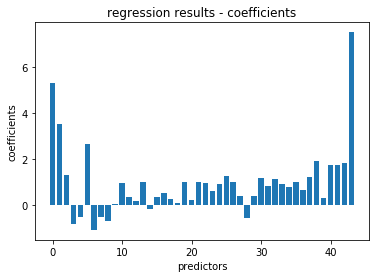

In [106]:
coef_plot(regr.coef_)

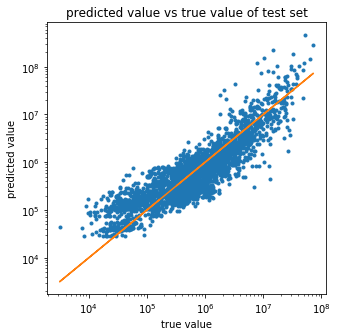

In [145]:
pred_value_plot(Y_test,Y_test_pred)

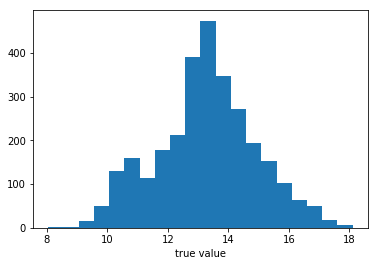

In [108]:
plt.hist(Y_test,bins=20)
plt.xlabel('true value')
plt.show()

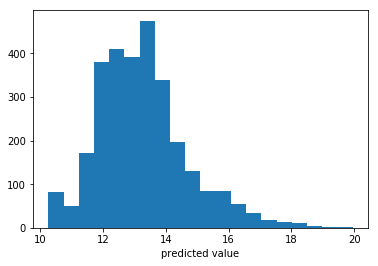

In [109]:
plt.hist(Y_test_pred,bins=20)
plt.xlabel('predicted value')
plt.show()

We have a lot of predicted values between 12-14 because we have three categorical transferred dummis.

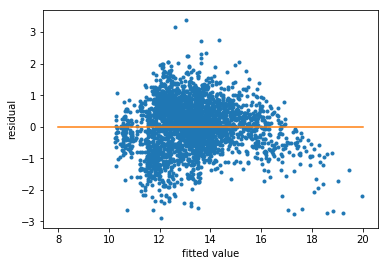

In [148]:
residual_plot(Y_test,Y_test_pred)

## L2 loss, no reg

In [111]:
# l2 loss, no regularizor, solve to the end
w = np.dot(np.linalg.pinv(X),Y)
Y_test_pred = np.dot(X_test,w)
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

mean_squared_error test: 0.6455


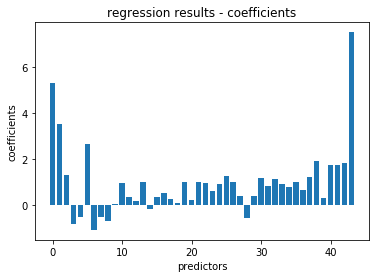

In [112]:
coef_plot(w)

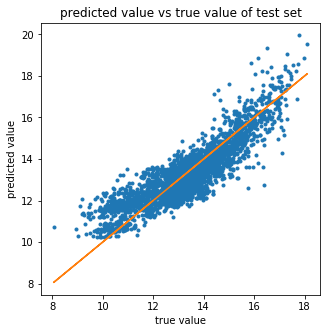

In [113]:
pred_value_plot(Y_test,Y_test_pred)

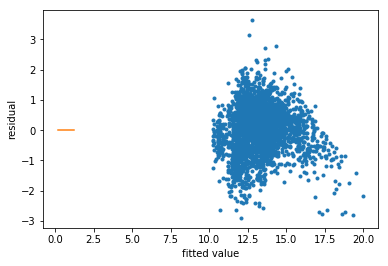

In [114]:
residual_plot(Y_test,Y_test_pred)

## L2 loss, lasso reg

In [115]:
# n-th fold cross validation
K = 10
kf = KFold(n_splits = K)
alpha_list = [0.0005,0.001,0.005,0.01]
error = np.zeros(len(alpha_list))
for i in range(len(alpha_list)):
    alpha = alpha_list[i]
    lasso = linear_model.Lasso(alpha=alpha, fit_intercept=False, normalize=False, max_iter=1000)
    for train_index, test_index in kf.split(X):
        Xv_train,Xv_test = X[train_index],X[test_index]
        Yv_train,Yv_test = Y[train_index],Y[test_index]
        lasso.fit(Xv_train,Yv_train)
        error[i] += mean_squared_error(Yv_test,lasso.predict(Xv_test))
error = error/(K*1.0)
error


array([ 0.6478,  0.6522,  0.6703,  0.694 ])

In [173]:
lasso = linear_model.Lasso(alpha=0.0005, fit_intercept=False, normalize=False, max_iter=1000)
# lasso = linear_model.Lasso(alpha=alpha_list[np.argmin(error)], fit_intercept=False, normalize=False, max_iter=5000)
lasso.fit(X,Y)
Y_test_pred = lasso.predict(X_test)
mean_squared_error(Y_test,Y_test_pred)

0.64857223065984826

In [175]:
lasso.coef_[18:28]

array([ 5.8722,  6.7494,  5.9853,  6.7577,  6.7021,  6.3623,  6.6913,
        7.0405,  6.7642,  6.1785])

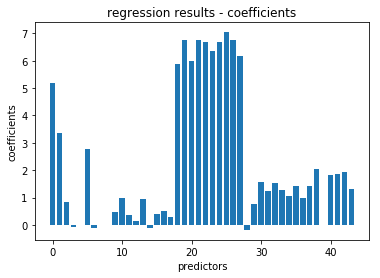

In [174]:
coef_plot(lasso.coef_)

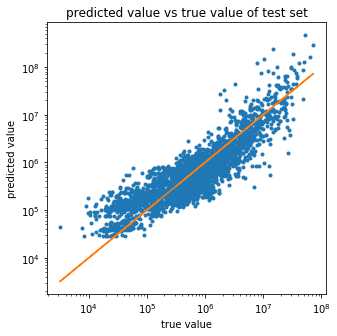

In [169]:
pred_value_plot(Y_test,Y_test_pred)

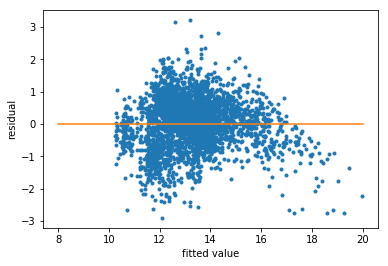

In [170]:
residual_plot(Y_test,Y_test_pred)

## L2 loss, smooth reg

In [184]:
# regression with regularization
# objective function of l2 loss smooth regularizor
def l2_smooth(w,X,Y,D,alpha=1.0):
     return mean_squared_error(Y,np.dot(X,w)) + alpha*np.square(np.linalg.norm(np.dot(D,w)))
# used to generate the D matrix in smooth regularizor 
def Dmatrix(n):
    r = 0
    t = np.zeros((n*(n-1)/2,n))
    for i in range(n-1):
        for j in range(i+1,n):
            t[r,i] = 1
            t[r,j] = -1
            r += 1
    return t

In [185]:
# stepsize for proximal gradient
U,s,V = np.linalg.svd(X)
step = 1.0/(2.0*np.square(s[0]))
# initial w
w0 = np.zeros(np.shape(X)[1])
# D matrix for smooth regularizor
D = np.zeros((100,np.shape(X)[1]))
D[0:45,18:28] = Dmatrix(10)
D[45:90,28:38] = Dmatrix(10)
D[90:100,38:43] = Dmatrix(5)

In [186]:
np.shape(w0)

(44L,)

In [189]:
# smooth proximator
def prox_smooth(stepsize,alpha,D,z):
    return np.dot(np.linalg.inv(2.0*stepsize*alpha*np.dot(D.T,D) + np.eye(np.shape(D)[1])),z)
# l2_smooth proximal gradient method
def proxi_grad_l2_smooth(X,Y,D,alpha,maxiters=1000,stepsize=step,w=w0):
    obj = []
    for i in range(maxiters):
        g = 2.0*np.dot(X.T,np.dot(X,w)-Y)
        z = w - stepsize*g
        w = prox_smooth(stepsize,alpha,D,z)
        obj.append(l2_smooth(w,X,Y,D,alpha))
    return obj,w

In [193]:
# n-th fold cross validation
K = 10
kf = KFold(n_splits = K)
alpha_list = [0.01,0.1,0.5,1.0]
error = np.zeros(len(alpha_list))
for i in range(len(alpha_list)):
    alpha = alpha_list[i]
    for train_index, test_index in kf.split(X):
        Xv_train,Xv_test = X[train_index],X[test_index]
        Yv_train,Yv_test = Y[train_index],Y[test_index]
        obj,w = proxi_grad_l2_smooth(Xv_train,Yv_train,D,alpha)
        error[i] += mean_squared_error(Yv_test,np.dot(Xv_test,w))
error = error/(K*1.0)
error

array([ 0.6748,  0.6748,  0.6749,  0.675 ])

In [194]:
np.argmin(error)

0

In [224]:
# obj,w = proxi_grad_l2_smooth(X,Y,D,alpha_list[np.argmin(error)])
obj,w = proxi_grad_l2_smooth(X,Y,D,5.0)
Y_test_pred = np.dot(X_test,w)
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

mean_squared_error test: 0.6731


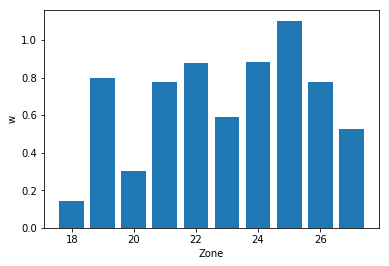

In [225]:
# smoothed coefficients for zones 
plt.bar(range(18,28),w[18:28])
plt.xlabel('Zone')
plt.ylabel('w')
plt.show()

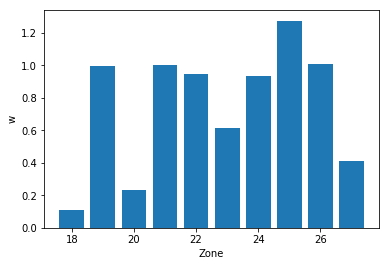

In [214]:
# original coefficients for zones
plt.bar(range(18,28),regr.coef_[18:28])
plt.xlabel('Zone')
plt.ylabel('w')
plt.show()

From the plot, classify zone into {0,2}{1,3,4,6,8}{7}{5,9}

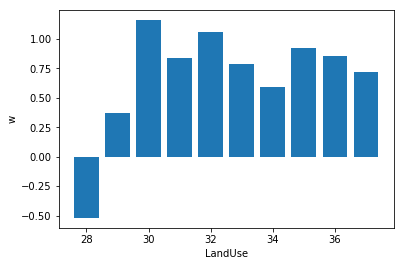

In [226]:
# smoothed coefficients for Landuse 
plt.bar(range(28,38),w[28:38])
plt.xlabel('LandUse')
plt.ylabel('w')
plt.show()

From the plot, classify landuse into {0}{1}{2,4,7}{3,5,6,8,9}

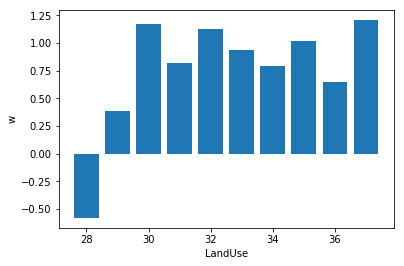

In [216]:
# original coefficients for LandUse
plt.bar(range(28,38),regr.coef_[28:38])
plt.xlabel('LandUse')
plt.ylabel('w')
plt.show()

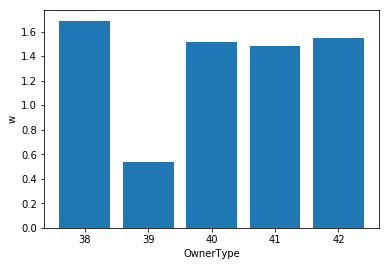

In [227]:
plt.bar(range(38,43),w[38:43])
plt.xlabel('OwnerType')
plt.ylabel('w')
plt.show()

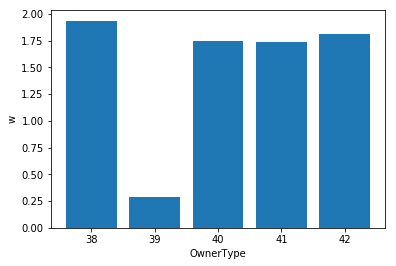

In [220]:
plt.bar(range(38,43),regr.coef_[38:43])
plt.xlabel('OwnerType')
plt.ylabel('w')
plt.show()

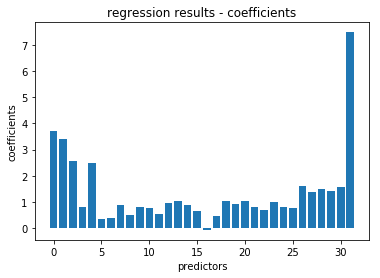

In [67]:
coef_plot(w)

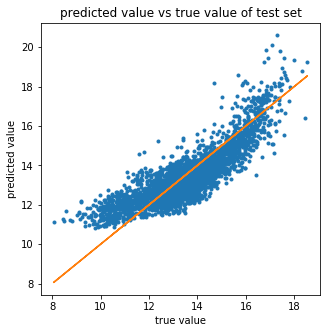

In [68]:
pred_value_plot(Y_test,Y_test_pred)

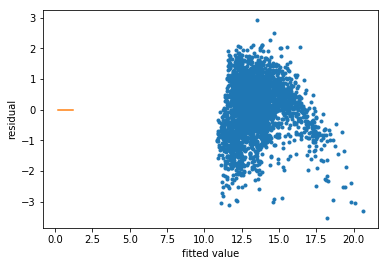

In [69]:
residual_plot(Y_test,Y_test_pred)

## l2 loss, ridge reg

In [149]:
# stepsize for proximal gradient
U,s,V = np.linalg.svd(X)
step = 1.0/(2.0*np.square(s[0]))
# initial w
w0 = np.zeros(np.shape(X)[1])

In [165]:
# ridge proximator
def prox_ridge(stepsize,alpha,z):
    return z/(2.0*stepsize*alpha+1)
# l2_ridge objective value
def l2_ridge(w,X,Y,alpha):
    return mean_squared_error(Y,np.dot(X,w)) + alpha*np.square(np.linalg.norm(w))
# l2_ridge proximal gradient method
def proxi_grad_l2_ridge(X,Y,alpha,maxiters=1000,stepsize=step,w=w0):
    obj = []
    for i in range(maxiters):
        g = 2.0*np.dot(X.T,np.dot(X,w)-Y)
        z = w - stepsize*g
        w = prox_ridge(stepsize,alpha,z)
        obj.append(l2_ridge(w,X,Y,alpha))
    return obj,w

In [166]:
# n-th fold cross validation
K = 10
kf = KFold(n_splits = K)
alpha_list = [0.001,0.01,0.1,1.0,3.0,6.0,10.0,30.0,60.0]
error = np.zeros(len(alpha_list))
for i in range(len(alpha_list)):
    alpha = alpha_list[i]
    for train_index, test_index in kf.split(X):
        Xv_train,Xv_test = X[train_index],X[test_index]
        Yv_train,Yv_test = Y[train_index],Y[test_index]
        obj,w = proxi_grad_l2_ridge(Xv_train,Yv_train,alpha)
        error[i] += mean_squared_error(Yv_test,np.dot(Xv_test,w))
error = error/(K*1.0)
error

array([ 0.6748,  0.6748,  0.6749,  0.6757,  0.6775,  0.6804,  0.6845,
        0.7078,  0.7472])

In [164]:
obj,w = proxi_grad_l2_ridge(X,Y,alpha_list[np.argmin(error)],maxiters=1000)
Y_test_pred = np.dot(X_test,w)
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

mean_squared_error test: 0.6719


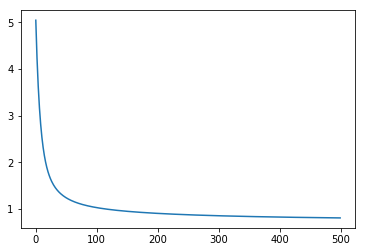

In [123]:
plt.plot(range(500),obj)
plt.show()

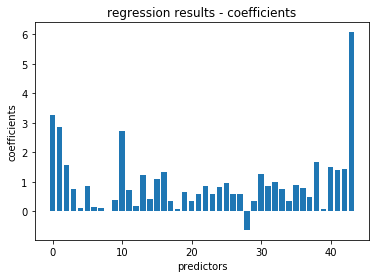

In [124]:
coef_plot(w)

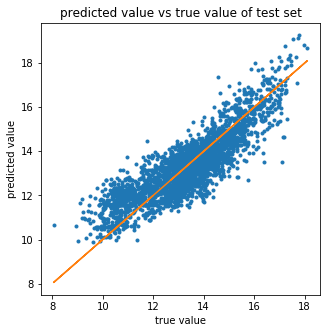

In [125]:
pred_value_plot(Y_test,Y_test_pred)

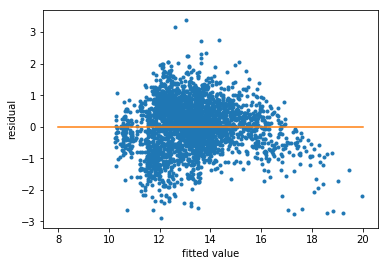

In [160]:
# residual = true - fitted
residual_plot(Y_test,Y_test_pred)
# plt.hist(Y_test-Y_test_pred)
# plt.xlabel('residual')
# plt.show()

## Huber,ridge

In [127]:
# n-th fold cross validation
K = 10
kf = KFold(n_splits = K)
epsilon_list = [2.0,3.0,4.0,5.0,6.0]
error = np.zeros(len(epsilon_list))
for i in range(len(epsilon_list)):
    huber = linear_model.HuberRegressor(epsilon=epsilon_list[i], max_iter=1000, alpha=0.)
    for train_index, test_index in kf.split(X):
        Xv_train,Xv_test = X[train_index],X[test_index]
        Yv_train,Yv_test = Y[train_index],Y[test_index]
        huber.fit(Xv_train,Yv_train)
        error[i] += mean_squared_error(Yv_test,huber.predict(Xv_test))
error = error/(K*1.0)
error

array([ 0.6486,  0.6473,  0.6471,  0.6471,  0.647 ])

In [228]:
huber = linear_model.HuberRegressor(epsilon=epsilon_list[np.argmin(error)], max_iter=1000, alpha=0)
# lasso = linear_model.Lasso(alpha=alpha_list[np.argmin(error)], fit_intercept=False, normalize=False, max_iter=5000)
huber.fit(X,Y)
Y_test_pred = huber.predict(X_test)
mean_squared_error(Y_test,Y_test_pred)

0.64654244121074889

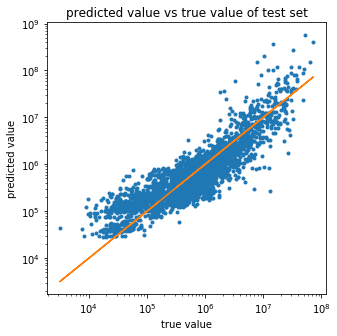

In [229]:
pred_value_plot(Y_test,Y_test_pred)

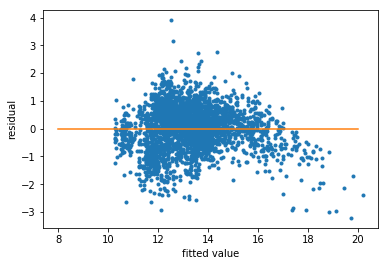

In [230]:
residual_plot(Y_test,Y_test_pred)

## two parts

In [26]:
# # n-th fold cross validation
K = 10
kf = KFold(n_splits = K)
t_list = [13,14,15,16,17]
error = np.zeros(len(t_list))
for i in range(len(t_list)):
    t = t_list[i]
    for train_index, test_index in kf.split(X):
        Xv_train,Xv_test = X[train_index],X[test_index]
        Yv_train,Yv_test = Y[train_index],Y[test_index]
        # fit two parts model on Xv_train
        X1 = np.squeeze(Xv_train[np.where(Yv_train<=t),:])
        X2 = np.squeeze(Xv_train[np.where(Yv_train>t),:])
        Y1 = Yv_train[np.where(Yv_train<=t)]
        Y2 = Yv_train[np.where(Yv_train>t)]
        w = np.dot(np.linalg.pinv(Xv_train),Yv_train)
        w1 = np.dot(np.linalg.pinv(X1),Y1)
        w2 = np.dot(np.linalg.pinv(X2),Y2)
        rough = np.dot(Xv_test,w)
        X_test1 = np.squeeze(Xv_test[np.where(rough<=t),:])
        X_test2 = np.squeeze(Xv_test[np.where(rough>t),:])
        Y_test1 = Yv_test[np.where(rough<=t)]
        Y_test2 = Yv_test[np.where(rough>t)]
        Y_test1_pred = np.dot(X_test1,w1)
        Y_test2_pred = np.dot(X_test2,w2)
        mse1 = mean_squared_error(Y_test1,Y_test1_pred)
        mse2 = mean_squared_error(Y_test2,Y_test2_pred)
        error[i] += (mse1*len(Y_test1)+mse2*len(Y_test2))/len(Yv_test)
error = error/(K*1.0)
error

array([ 0.54114484,  0.54932835,  0.52980347,  0.5747301 ,  1.02117966])

In [27]:
# l2 loss, no regularizor, two parts
t = 15
X1 = np.squeeze(X[np.where(Y<=t),:])
X2 = np.squeeze(X[np.where(Y>t),:])
Y1 = Y[np.where(Y<=t)]
Y2 = Y[np.where(Y>t)]
w = np.dot(np.linalg.pinv(X),Y)
w1 = np.dot(np.linalg.pinv(X1),Y1)
w2 = np.dot(np.linalg.pinv(X2),Y2)
rough = np.dot(X_test,w)
X_test1 = np.squeeze(X_test[np.where(rough<=t),:])
X_test2 = np.squeeze(X_test[np.where(rough>t),:])
Y_test1 = Y_test[np.where(rough<=t)]
Y_test2 = Y_test[np.where(rough>t)]
Y_test1_pred = np.dot(X_test1,w1)
Y_test2_pred = np.dot(X_test2,w2)
mse1 = mean_squared_error(Y_test1,Y_test1_pred)
mse2 = mean_squared_error(Y_test2,Y_test2_pred)
print('mean_squared_error test: %.4f' % mse1)
print('mean_squared_error test: %.4f' % mse2)
print (mse1*len(Y_test1)+mse2*len(Y_test2))/len(Y_test)

mean_squared_error test: 0.5349
mean_squared_error test: 0.2943
0.510063152971


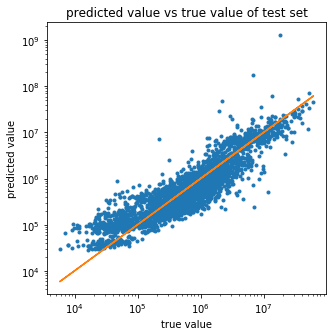

In [28]:
pred_value_plot(np.hstack((Y_test1,Y_test2)),np.hstack((Y_test1_pred,Y_test2_pred)))

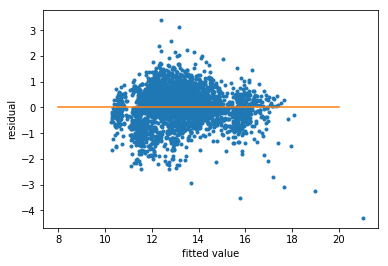

In [29]:
residual_plot(np.hstack((Y_test1,Y_test2)),np.hstack((Y_test1_pred,Y_test2_pred)))

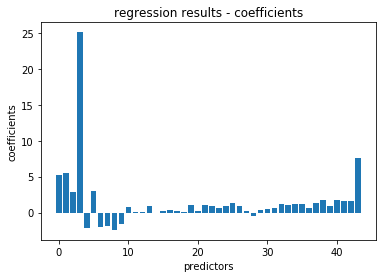

In [31]:
coef_plot(w1)

In [33]:
w1

array([  5.20164118,   5.53023006,   2.8952026 ,  25.08066146,
        -2.09629121,   3.02826552,  -1.98129903,  -1.80296569,
        -2.41125413,  -1.53048365,   0.72118204,   0.10546108,
         0.04990495,   0.94717849,  -0.03946132,   0.25596559,
         0.32546672,   0.20557219,   0.11854424,   1.03400341,
         0.25179286,   1.09599038,   0.95421537,   0.63914376,
         0.93351076,   1.33902815,   0.9523764 ,   0.25670983,
        -0.44328812,   0.35951176,   0.55031773,   0.59914728,
         1.21397827,   1.00324024,   1.24340115,   1.15101178,
         0.60995692,   1.28803813,   1.81275317,   0.88547227,
         1.72335657,   1.55307479,   1.60065836,   7.57531516])

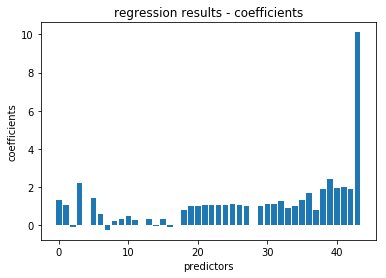

In [32]:
coef_plot(w2)

In [34]:
w2

array([  1.30054258e+00,   1.06355238e+00,  -9.76276405e-02,
         2.20752279e+00,   1.02559431e-02,   1.40242893e+00,
         5.55944135e-01,  -2.54980261e-01,   2.08146038e-01,
         3.41910083e-01,   4.73133040e-01,   2.46750902e-01,
         2.62645888e-04,   3.37829978e-01,  -6.24948671e-02,
         3.35158968e-01,  -1.05901404e-01,   2.45149496e-02,
         7.85804779e-01,   1.01793533e+00,   1.00708709e+00,
         1.05294050e+00,   1.05971850e+00,   1.03424004e+00,
         1.03263926e+00,   1.07953941e+00,   1.07034395e+00,
         9.74137045e-01,  -1.82868329e-16,   9.74424738e-01,
         1.08196761e+00,   1.11879384e+00,   1.23721892e+00,
         9.20386515e-01,   9.77667660e-01,   1.32762038e+00,
         1.68536466e+00,   7.90941588e-01,   1.89921345e+00,
         2.39582810e+00,   1.92365741e+00,   1.98024460e+00,
         1.91544234e+00,   1.01143859e+01])